# NLP: NLTK End to End Text Processing

## General Feature Extraction 'Data Understanging'
* Import the Dataset
* Target Value Count
* Word counts
* Characters count
* Average characters per word
* Stop words count
* Count punctuations
* Count numeric digits
* URLs
* Emails

## Preprocessing and Cleaning
* Lower case
* Contraction to Expansion
* Emails removal
* URLs removal
* Remove punctuations
* Remove HTML Tags
* Convert Accent Chars
* Remove Stop Words
* Remove Extra Spaces
* Stemming NLTK 
* Lemmatizing NLTK

## Word Cloud and EDA

* EDA Target
* Rare words removal
* WordCloud
* Tokenizing

## Data Splitting & (Voctrization - TFIDF)
* Data Splitting X,y
* Voctrization
* TFIDF

## Advanced Text Processing and Feature Extraction

* Count Vectorization
* TFIDF

# Import Python Libraries

In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from tabulate import tabulate
from nltk.corpus import stopwords

import re
import contractions
import unicodedata
from nltk.stem import WordNetLemmatizer

import nltk
lemmatizer = WordNetLemmatizer()

from wordcloud import WordCloud 

from nltk.stem import PorterStemmer
ps = PorterStemmer()

from nltk.corpus import wordnet

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()

from textblob import TextBlob

# Import Dataset

In [3]:
df = pd.read_csv('C:/Users/rbani/OneDrive/Desktop/My Final AI/GitHub Codes/Sentimant Analysis/NLP Complete Text Processing/Complete_Text_Processing_Text.csv', encoding = 'latin1', header = None)

In [4]:
pd.DataFrame(df)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Data Pre-Prepration

## Drop Variables

In [5]:
df = df[[5,0]]

In [6]:
pd.DataFrame(df.head())

,5,0
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


## Rename Columns

In [7]:
df.columns = ['twitts', 'sentiment']
pd.DataFrame(df.head())

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


# Data Understanging 

## Target Value Count

In [8]:
print(df['sentiment'].value_counts())

0    800000
4    800000
Name: sentiment, dtype: int64


## word counts

In [9]:
df['word_count'] = df['twitts'].apply(lambda x : len(str(x).split()))
pd.DataFrame(df.head())

,twitts,sentiment,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


## Char Count 

In [10]:
df['char_count'] = df['twitts'].apply(lambda x : len(x))
pd.DataFrame(df.head())

,twitts,sentiment,word_count,char_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


## Avg word length

In [11]:
df['avg_word_len'] = df['char_count']/df['word_count']
pd.DataFrame(df.head())

,twitts,sentiment,word_count,char_count,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,6.052632
1,is upset that he can't update his Facebook by ...,0,21,111,5.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,4.944444
3,my whole body feels itchy and like its on fire,0,10,47,4.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,5.285714


## NLTK Stop Words 

In [12]:
stop_words = set(stopwords.words("english"))

In [13]:
print("NLTK Stopwordes are: \n", stop_words)

NLTK Stopwordes are: 
 {'very', 'below', 'then', 'between', 'her', 'a', 'don', 'and', 'who', 'other', 'only', 'ours', 'himself', 'ain', "hadn't", 'with', 'yourself', 'it', "didn't", "isn't", "couldn't", 'these', "it's", 'so', 'doing', 'been', 're', 'is', 'o', 'him', 'were', 'its', 'your', 'their', 'haven', 'what', 'has', 'under', 'once', 'than', "should've", 'won', 'why', 'few', "doesn't", "wouldn't", 'before', 'such', 'over', 'hadn', 'again', "she's", 'mustn', 'not', 'themselves', 'in', 'up', 'which', 'you', 'all', 'no', 's', 'to', 'against', 'further', 't', 'should', 'ma', 'into', 'are', 'his', 'mightn', 'doesn', 'having', 'will', 'now', "you've", 'me', 'during', 'our', 'own', 'myself', 'she', 'yours', 'does', 'some', "haven't", 'if', 'ourselves', "you'll", 'any', "weren't", 'or', 'after', 'where', 'most', 'itself', "don't", 'my', 'this', 'that', 'through', 'i', "aren't", 'nor', 'did', 've', 'hers', 'shouldn', 'there', "needn't", 'do', 'because', 'didn', 'was', 'about', 'until', 'll'

In [14]:
print(len(stop_words))

179


In [15]:
df['stopWords_words'] = df['twitts'].apply(lambda x : [ t for t in x.split() if t in stop_words])
pd.DataFrame(df.head())

,twitts,sentiment,word_count,char_count,avg_word_len,stopWords_words
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,6.052632,"[a, of, to, do]"
1,is upset that he can't update his Facebook by ...,0,21,111,5.285714,"[is, that, he, his, by, and, as, a]"
2,@Kenichan I dived many times for the ball. Man...,0,18,89,4.944444,"[for, the, to, out, of]"
3,my whole body feels itchy and like its on fire,0,10,47,4.700000,"[my, and, its, on]"
4,"@nationwideclass no, it's not behaving at all....",0,21,111,5.285714,"[it's, not, at, why, am, i, because, you, all,..."


In [16]:
df['len_of_stopWords'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t in stop_words]))
pd.DataFrame(df.head())

,twitts,sentiment,word_count,char_count,avg_word_len,stopWords_words,len_of_stopWords
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,6.052632,"[a, of, to, do]",4
1,is upset that he can't update his Facebook by ...,0,21,111,5.285714,"[is, that, he, his, by, and, as, a]",8
2,@Kenichan I dived many times for the ball. Man...,0,18,89,4.944444,"[for, the, to, out, of]",5
3,my whole body feels itchy and like its on fire,0,10,47,4.700000,"[my, and, its, on]",4
4,"@nationwideclass no, it's not behaving at all....",0,21,111,5.285714,"[it's, not, at, why, am, i, because, you, all,...",10


## punctuations

In [17]:
def check_find_punctuations(text):
    result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
                        text)
    string = "".join(result)
    
    return list(string)

In [18]:
df['punctuation_used'] = df['twitts'].apply(
                         lambda x : check_find_punctuations(x)
                         )

In [19]:
pd.DataFrame(df.head())

,twitts,sentiment,word_count,char_count,avg_word_len,stopWords_words,len_of_stopWords,punctuation_used
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,6.052632,"[a, of, to, do]",4,"[@, :, /, /, ., /, -, ,, ', ., ., ;]"
1,is upset that he can't update his Facebook by ...,0,21,111,5.285714,"[is, that, he, his, by, and, as, a]",8,"[', ., ., ., ., !]"
2,@Kenichan I dived many times for the ball. Man...,0,18,89,4.944444,"[for, the, to, out, of]",5,"[@, ., %]"
3,my whole body feels itchy and like its on fire,0,10,47,4.700000,"[my, and, its, on]",4,[]
4,"@nationwideclass no, it's not behaving at all....",0,21,111,5.285714,"[it's, not, at, why, am, i, because, you, all,...",10,"[@, ,, ', ., ', ., ?, ', .]"


## Numerical Digits

In [20]:
df['numeric'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))
pd.DataFrame(df.head())

,twitts,sentiment,word_count,char_count,avg_word_len,stopWords_words,len_of_stopWords,punctuation_used,numeric
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,6.052632,"[a, of, to, do]",4,"[@, :, /, /, ., /, -, ,, ', ., ., ;]",0
1,is upset that he can't update his Facebook by ...,0,21,111,5.285714,"[is, that, he, his, by, and, as, a]",8,"[', ., ., ., ., !]",0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,4.944444,"[for, the, to, out, of]",5,"[@, ., %]",0
3,my whole body feels itchy and like its on fire,0,10,47,4.700000,"[my, and, its, on]",4,[],0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,5.285714,"[it's, not, at, why, am, i, because, you, all,...",10,"[@, ,, ', ., ', ., ?, ', .]",0


## URLs

In [21]:
df['num_urls_flag'] = df['twitts'].apply(lambda x: len(re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)))
df['urls_flag'] = df['twitts'].apply(lambda x: re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x))

In [22]:
pd.DataFrame(df['urls_flag'][df['num_urls_flag']>0])

,urls_flag
0,[http://twitpic.com/2y1zl]
37,[http://is.gd/fNge]
50,[http://tinyurl.com/dcuc33]
74,[http://twitpic.com/2y2es]
95,[http://apps.facebook.com/dogbook/profile/view...
...,...
1599961,[http://bit.ly/2lQbBv]
1599973,[http://twitpic.com/7jp4n]
1599981,[http://tinyurl.com/m6j2an]
1599985,[http://tinyurl.com/n65xjt]


## Emails

In [23]:
df['Emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))
df['Emails_count'] = df['Emails'].apply(lambda x: len(x))

In [24]:
pd.DataFrame(df['Emails'][df['Emails_count']>0])

,Emails
4054,[gabbehhramos@yahoo.com]
7917,[elledell@gmail.com]
8496,[missataari@gmail.com]
10290,[hello.kitty.65@hotmail.com]
16413,[press@linkedin.com]
...,...
1588338,[hello@tastelikekisses.com]
1589132,[aadvanspijk@yahoo.co.uk]
1590489,[lbruton@tulsalanparty.com]
1591675,[jill@q985fm.com]


# Data Preprocessing

## Create New DataFrame 

In [25]:
df_new = df[['twitts', 'sentiment']]

In [26]:
pd.DataFrame(df_new)

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


## Spelling Correction

In [27]:
def spell_correction(spcor):
    return spcor.apply(lambda x: str(TextBlob(x).correct()))

In [28]:
#df['twitts'] = spell_correction(df['twitts'])

## Lower Case Conversion

In [29]:
df_new['twitts'] = df_new['twitts'].apply(lambda x : x.lower())
pd.DataFrame(df_new)

C:\Users\rbani\AppData\Local\Temp\ipykernel_3332\3362080885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['twitts'] = df_new['twitts'].apply(lambda x : x.lower())


,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0
1,is upset that he can't update his facebook by ...,0
2,@kenichan i dived many times for the ball. man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,just woke up. having no school is the best fee...,4
1599996,thewdb.com - very cool to hear old walt interv...,4
1599997,are you ready for your mojo makeover? ask me f...,4
1599998,happy 38th birthday to my boo of alll time!!! ...,4


## Contraction to Expansion

In [30]:
df_new['no_contract'] = df_new['twitts'].apply(lambda x: [contractions.fix(word) for word in x.split()])

C:\Users\rbani\AppData\Local\Temp\ipykernel_3332\1695251878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['no_contract'] = df_new['twitts'].apply(lambda x: [contractions.fix(word) for word in x.split()])


In [31]:
df_new['twitts'] = [' '.join(map(str, l)) for l in df_new['no_contract']]

C:\Users\rbani\AppData\Local\Temp\ipykernel_3332\1635763228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['twitts'] = [' '.join(map(str, l)) for l in df_new['no_contract']]


In [32]:
df_new = df_new.drop('no_contract', axis=1)

In [33]:
pd.DataFrame(df_new)

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0
1,is upset that he cannot update his facebook by...,0
2,@kenichan i dived many times for the ball. man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it is not behaving at all...",0
...,...,...
1599995,just woke up. having no school is the best fee...,4
1599996,thewdb.com - very cool to hear old walt interv...,4
1599997,are you ready for your mojo makeover? ask me f...,4
1599998,happy 38th birthday to my boo of alll time!!! ...,4


## Remove Emails

In [34]:
df_new['twitts'] = df_new['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))
pd.DataFrame(df_new)

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0
1,is upset that he cannot update his facebook by...,0
2,@kenichan i dived many times for the ball. man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it is not behaving at all...",0
...,...,...
1599995,just woke up. having no school is the best fee...,4
1599996,thewdb.com - very cool to hear old walt interv...,4
1599997,are you ready for your mojo makeover? ask me f...,4
1599998,happy 38th birthday to my boo of alll time!!! ...,4


## Remove URLs

In [35]:
df_new['twitts'] = df_new['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x))
pd.DataFrame(df_new)

,twitts,sentiment
0,"@switchfoot - awww, that is a bummer. you sho...",0
1,is upset that he cannot update his facebook by...,0
2,@kenichan i dived many times for the ball. man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it is not behaving at all...",0
...,...,...
1599995,just woke up. having no school is the best fee...,4
1599996,thewdb.com - very cool to hear old walt interv...,4
1599997,are you ready for your mojo makeover? ask me f...,4
1599998,happy 38th birthday to my boo of alll time!!! ...,4


## Remove punctuations

In [36]:
df_new['twitts'] = df_new['twitts'].apply(lambda x : re.sub(r'[^\w\s]','', x))
pd.DataFrame(df_new)

,twitts,sentiment
0,switchfoot awww that is a bummer you shoulda...,0
1,is upset that he cannot update his facebook by...,0
2,kenichan i dived many times for the ball manag...,0
3,my whole body feels itchy and like its on fire,0
4,nationwideclass no it is not behaving at all i...,0
...,...,...
1599995,just woke up having no school is the best feel...,4
1599996,thewdbcom very cool to hear old walt intervie...,4
1599997,are you ready for your mojo makeover ask me fo...,4
1599998,happy 38th birthday to my boo of alll time tup...,4


## Remove HTML Tags

In [37]:
TAG_RE = re.compile(r'<[^>]+>')
df_new['twitts'] = df_new['twitts'].apply(lambda x : TAG_RE.sub('', x) )
pd.DataFrame(df_new)

,twitts,sentiment
0,switchfoot awww that is a bummer you shoulda...,0
1,is upset that he cannot update his facebook by...,0
2,kenichan i dived many times for the ball manag...,0
3,my whole body feels itchy and like its on fire,0
4,nationwideclass no it is not behaving at all i...,0
...,...,...
1599995,just woke up having no school is the best feel...,4
1599996,thewdbcom very cool to hear old walt intervie...,4
1599997,are you ready for your mojo makeover ask me fo...,4
1599998,happy 38th birthday to my boo of alll time tup...,4


## Convert Accent Chars

In [38]:
def remove_accents(input_str):
  only_ascii = unicodedata.normalize('NFKD', input_str).encode('ASCII', 'ignore').decode('utf-8', 'ignore')
  return only_ascii

df_new['twitts'] = df_new['twitts'].apply(lambda x : remove_accents(x) )

In [39]:
pd.DataFrame(df_new)

,twitts,sentiment
0,switchfoot awww that is a bummer you shoulda...,0
1,is upset that he cannot update his facebook by...,0
2,kenichan i dived many times for the ball manag...,0
3,my whole body feels itchy and like its on fire,0
4,nationwideclass no it is not behaving at all i...,0
...,...,...
1599995,just woke up having no school is the best feel...,4
1599996,thewdbcom very cool to hear old walt intervie...,4
1599997,are you ready for your mojo makeover ask me fo...,4
1599998,happy 38th birthday to my boo of alll time tup...,4


## Remove Stop Words

In [40]:
df_new['twitts'] = df_new['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in stop_words]))
pd.DataFrame(df_new)

,twitts,sentiment
0,switchfoot awww bummer shoulda got david carr ...,0
1,upset cannot update facebook texting might cry...,0
2,kenichan dived many times ball managed save 50...,0
3,whole body feels itchy like fire,0
4,nationwideclass behaving mad cannot see,0
...,...,...
1599995,woke school best feeling ever,4
1599996,thewdbcom cool hear old walt interviews,4
1599997,ready mojo makeover ask details,4
1599998,happy 38th birthday boo alll time tupac amaru ...,4


## Remove Extra Spaces

In [41]:
df_new['twitts'] = df_new['twitts'].apply(lambda x :  " ".join(x.split()))
pd.DataFrame(df_new)

,twitts,sentiment
0,switchfoot awww bummer shoulda got david carr ...,0
1,upset cannot update facebook texting might cry...,0
2,kenichan dived many times ball managed save 50...,0
3,whole body feels itchy like fire,0
4,nationwideclass behaving mad cannot see,0
...,...,...
1599995,woke school best feeling ever,4
1599996,thewdbcom cool hear old walt interviews,4
1599997,ready mojo makeover ask details,4
1599998,happy 38th birthday boo alll time tupac amaru ...,4


## Stemming NLTK

In [42]:
df_new['twitts'] =  df_new['twitts'].apply(lambda x: ' '.join([ps.stem(w) for w in nltk.word_tokenize(x)]))

In [43]:
pd.DataFrame(df_new)

,twitts,sentiment
0,switchfoot awww bummer shoulda got david carr ...,0
1,upset can not updat facebook text might cri re...,0
2,kenichan dive mani time ball manag save 50 res...,0
3,whole bodi feel itchi like fire,0
4,nationwideclass behav mad can not see,0
...,...,...
1599995,woke school best feel ever,4
1599996,thewdbcom cool hear old walt interview,4
1599997,readi mojo makeov ask detail,4
1599998,happi 38th birthday boo alll time tupac amaru ...,4


## Lemmatizing NLTK

In [44]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [45]:
df_new['twitts'] =  df_new['twitts'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]))

In [46]:
print(tabulate(df_new.head(25), headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------------------------------------+-------------+
|    | twitts                                                                    |   sentiment |
|----+---------------------------------------------------------------------------+-------------|
|  0 | switchfoot awww bummer shoulda get david carr third day                   |           0 |
|  1 | upset can not updat facebook text might cri result school today also blah |           0 |
|  2 | kenichan dive mani time ball manag save 50 rest go bound                  |           0 |
|  3 | whole bodi feel itchi like fire                                           |           0 |
|  4 | nationwideclass behav mad can not see                                     |           0 |
|  5 | kwesidei whole crew                                                       |           0 |
|  6 | need hug                                                                  |           0 |
|  7 | loltrish hey long time 

# Word Cloud and EDA

## EDA

0    800000
4    800000
Name: sentiment, dtype: int64


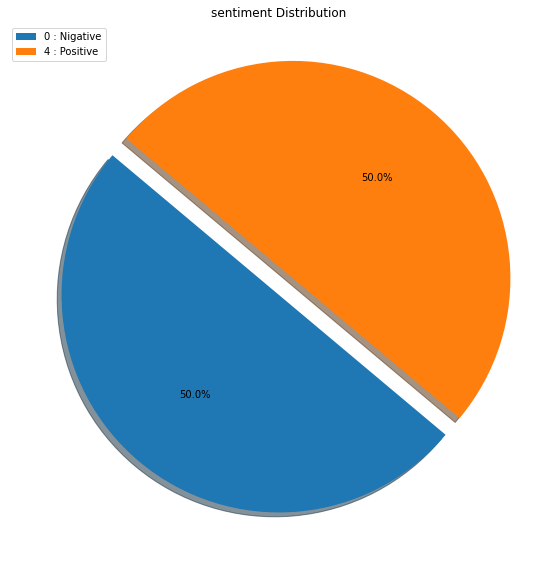

In [47]:
print(df_new['sentiment'].value_counts())

plt.figure(figsize=(10,10))

explode = [0,0.1]
plt.pie(df_new['sentiment'].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['0 : Nigative','4 : Positive'])
plt.title('sentiment Distribution')
plt.axis('off');

## Word Cloud & Rare words removal

In [48]:
df_new_new = df_new.copy(deep=True)

### Rare words removal

In [49]:
rare_words = pd.Series(" ".join(df_new_new["twitts"]).split()).value_counts()
rare_words = rare_words[rare_words <= 2] 
rare_words.index
df_new_new["twitts"] = df_new_new["twitts"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_new_new["twitts"].head()

0    switchfoot awww bummer shoulda get david carr ...
1    upset can not updat facebook text might cri re...
2    kenichan dive mani time ball manag save 50 res...
3                      whole bodi feel itchi like fire
4                nationwideclass behav mad can not see
Name: twitts, dtype: object

In [50]:
# " ".join(df_new_new["twitts"]).split()

### Word Cloud

In [51]:
positive_words =" ".join(df_new_new[df_new_new["sentiment"] == 4].twitts).split()
len(positive_words)

5515296

In [52]:
negative_words =" ".join(df_new_new[df_new_new["sentiment"] == 0].twitts).split()
len(negative_words)

5735171

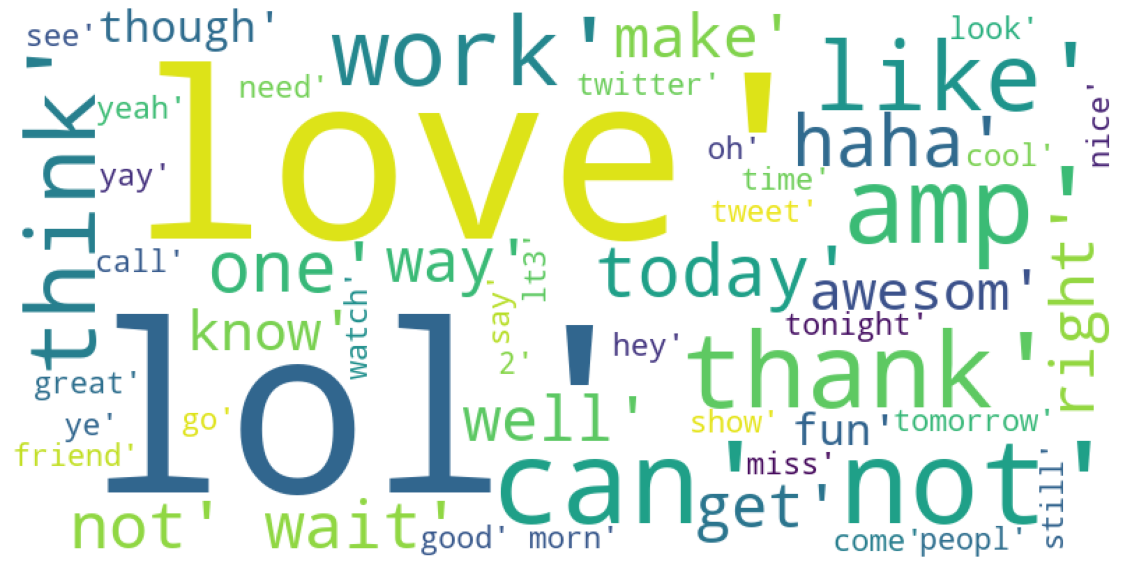

In [53]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 50).generate(str(positive_words))

plt.figure(figsize = (20, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

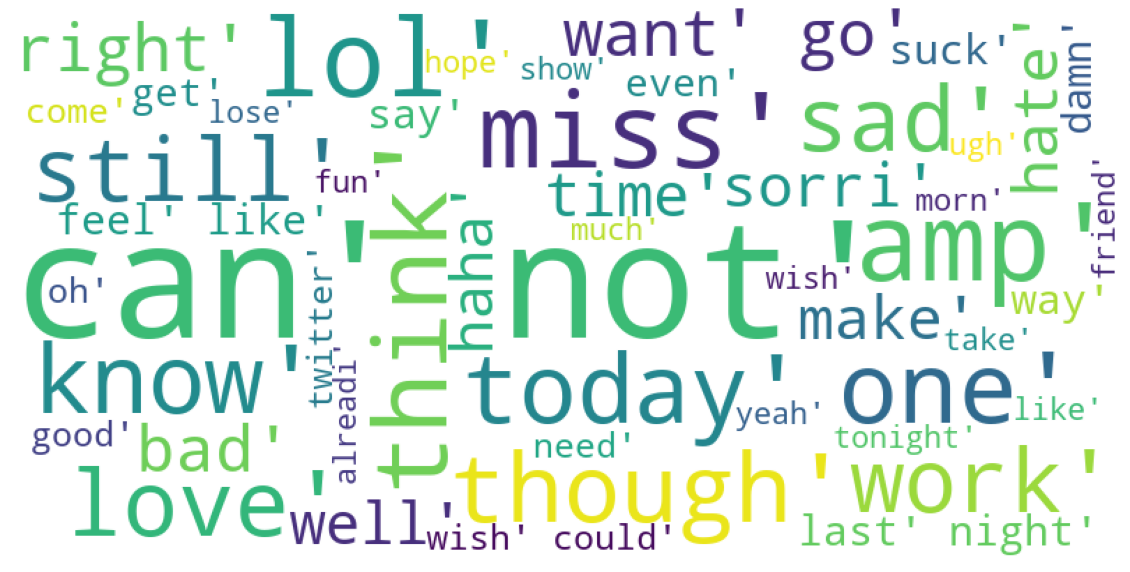

In [54]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 50).generate(str(negative_words))

plt.figure(figsize = (20, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Tokenizing

In [55]:
# df_new_new['twitts'] = df_new_new['twitts'].apply(lambda x : nltk.word_tokenize(x))

In [56]:
# print(tabulate(df_new_new.head(25), headers = 'keys', tablefmt = 'psql'))

# Data Splitting & (Voctrization - TFIDF)

In [57]:
X = df_new_new["twitts"].values
y = df_new_new["sentiment"].map({0:4, 4:0}).values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (1280000,)
y_train:  (1280000,)
X_test:  (320000,)
y_test:  (320000,)


In [59]:
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)
pd.DataFrame(X_train_count)

,0
0,"(0, 110805)\t1\n (0, 131331)\t1\n (0, 1158..."
1,"(0, 97340)\t1\n (0, 12414)\t1\n (0, 107563..."
2,"(0, 17207)\t1\n (0, 76541)\t1\n (0, 111533..."
3,"(0, 69091)\t1\n (0, 78081)\t1\n (0, 39878)..."
4,"(0, 48697)\t1\n (0, 40414)\t1"
...,...
1279995,"(0, 68561)\t1\n (0, 17207)\t1\n (0, 128922..."
1279996,"(0, 64217)\t1\n (0, 73875)\t1\n (0, 39227)..."
1279997,"(0, 12414)\t1\n (0, 45374)\t1\n (0, 20428)..."
1279998,"(0, 44418)\t1\n (0, 101396)\t1\n (0, 10384..."


In [60]:
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)
pd.DataFrame(X_train_tf_idf)

,0
0,"(0, 68561)\t0.31638567338631274\n (0, 67604..."
1,"(0, 83131)\t0.3013850249799767\n (0, 29897)..."
2,"(0, 16996)\t0.2984740646233098\n (0, 92697)..."
3,"(0, 44418)\t0.13265977396737766\n (0, 45374..."
4,"(0, 40414)\t0.7196135123399356\n (0, 48697)..."
...,...
1279995,"(0, 76024)\t0.4112207407954553\n (0, 10602)..."
1279996,"(0, 54354)\t0.5480254483913801\n (0, 33983)..."
1279997,"(0, 101744)\t0.5258214066239271\n (0, 10640..."
1279998,"(0, 17494)\t0.6484643970916149\n (0, 103848..."
